# Import Library

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Add German_credit_data Dataset

In [5]:
data = pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
data.shape

(1000, 10)

In [7]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

## Clasify types of data
### divide data into numerical and categorical types

In [9]:
numeric = ['Age', 'Job', 'Credit amount', 'Duration']
categorical = data.drop(data[numeric], axis=1)
numerical = data[numeric]
numerical.head()

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24


In [10]:
categorical.head()

,Unnamed: 0,Sex,Housing,Saving accounts,Checking account,Purpose
0,0,male,own,NaN,little,radio/TV
1,1,female,own,little,moderate,radio/TV
2,2,male,own,little,NaN,education
3,3,male,free,little,little,furniture/equipment
4,4,male,free,little,little,car


## Fill all missing values in each types of data
#### check missing values

In [11]:
#Check missing values
count_missing = data.isnull().sum().sort_values(ascending=False)
print(count_missing)
presentage_missing = round(data.isnull().sum()/len(data)*100, 2).sort_values(ascending=False)
print(presentage_missing)

Checking account    394
Saving accounts     183
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Checking account    39.4
Saving accounts     18.3
Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64


### Fill missing Values

In [12]:
#fill missing values on categorical types
for i in categorical.columns:
    if data[i].isnull().sum() != 0:
        print(i)
        data[i] = data[i].fillna(data[i].mode().values[0])
        
    

Saving accounts
Checking account


In [13]:
#Check missing values again!!
count_missing = data.isnull().sum().sort_values(ascending=False)
print(count_missing)
presentage_missing = round(data.isnull().sum()/len(data)*100, 2).sort_values(ascending=False)
print(presentage_missing)

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64
Unnamed: 0          0.0
Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
dtype: float64


# Visualization

* Histogram
* Disribution Plot
* Box Plot
* Corelation Heatmap
* Scater Plot
* Pie Chart
* Bar Plot

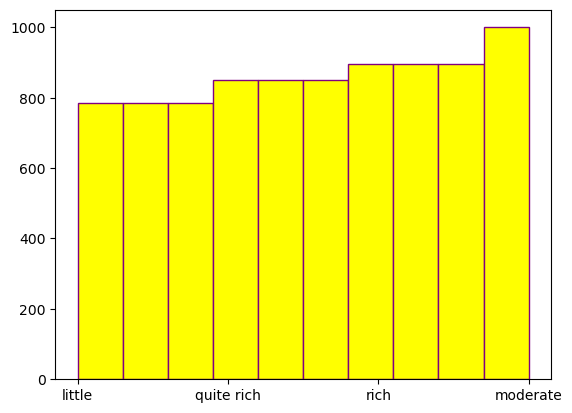

In [14]:
#Histogram
plt.hist(data['Saving accounts'], facecolor='yellow', edgecolor='purple', cumulative=True)
plt.show()

#### Dapat di liat pada histogram menunjukan orang dengan penyimpanan besar lebih sedikit dibandingkan dengan yang lain

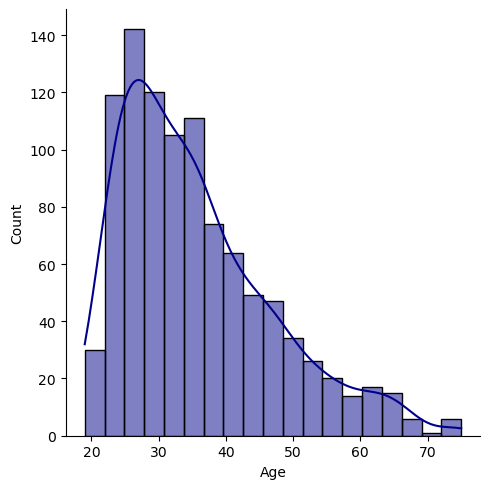

In [15]:
#Distribution Plot
sns.displot(data['Age'], kde = True, color = 'darkblue', label = 'Age')

#### Dapat dilihat rentang umur yang memiliki credit paling banyak adalah di rentang usia 25-32 tahun

<AxesSubplot: >

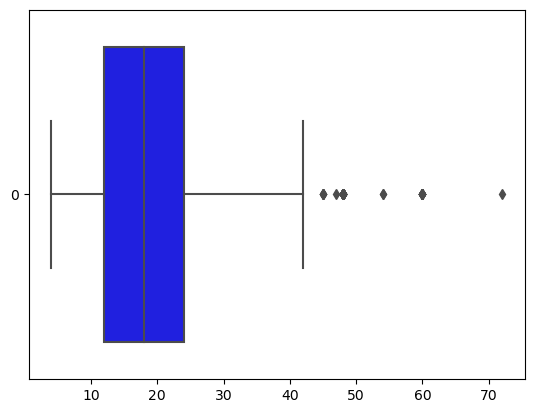

In [16]:
#Box Plot
sns.boxplot(data['Duration'], color='blue', orient='h')

#### Dengan Box Plot dapat dilihat durasi penjimanan, dan masih terdapat pembayaran diluar durasi yang sudah ditentukan/outliers

C:\Users\Fajar\AppData\Local\Temp\ipykernel_11508\2465884829.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='pearson')


<AxesSubplot: >

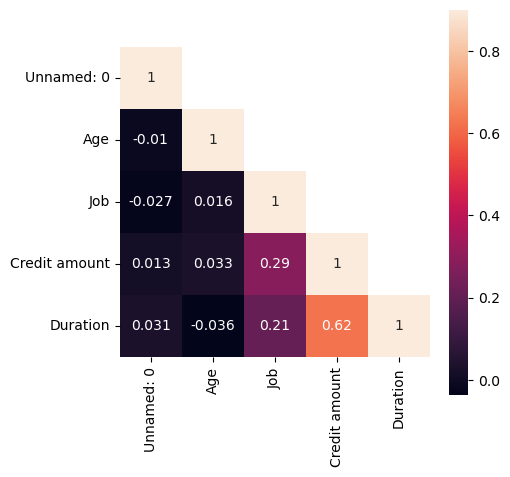

In [17]:
#Corelation Heatmap
corr = data.corr(method='pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(5,5)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

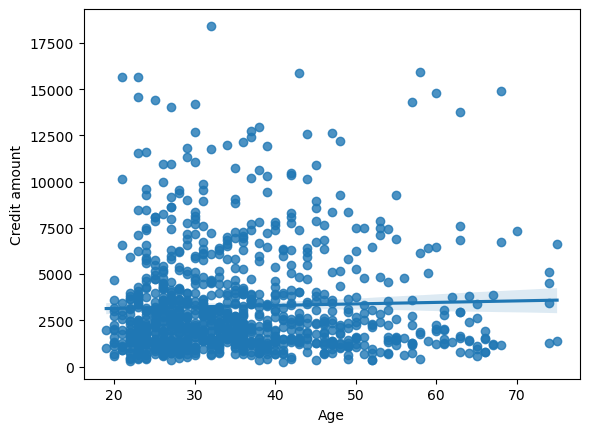

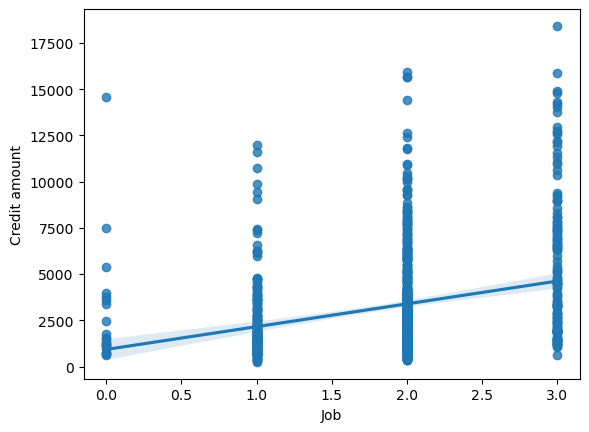

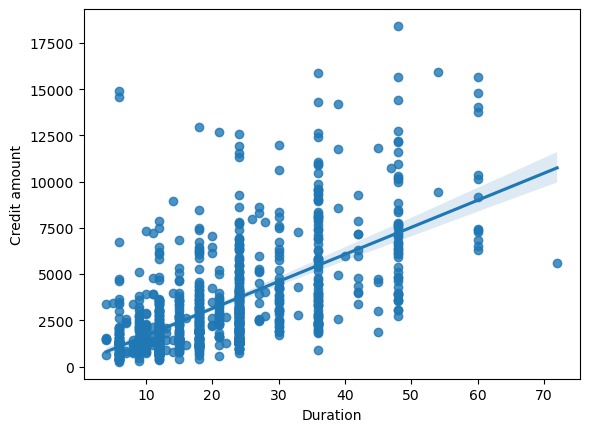

In [18]:
#Scatter Plot
def regplot(data, features, target):
    for index, feature in enumerate(features):
        sns.regplot(x = feature, y = target, data = data)
        plt.show()
num = ['Age','Job','Duration']
regplot(data, num, 'Credit amount')

#### Dapat dilihat hubungan antara variabel Age, Job, Duration terhadap variabel Credit amount

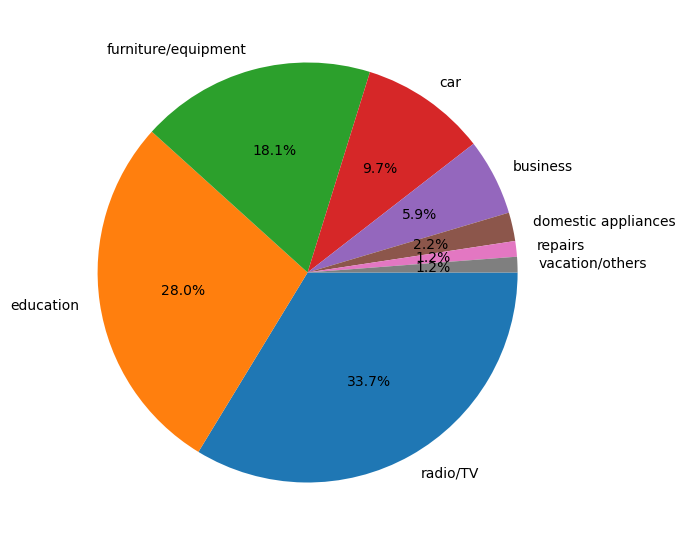

In [19]:
#Pie Chart
count = data['Purpose'].value_counts()
label = data['Purpose'].unique()
f = plt.figure(figsize=(40, 15))
f.add_subplot(2, 6, 6)
plt.axis('equal')
plt.pie(count, labels = label, autopct = '%1.1f%%', counterclock = False)
plt.show()

#### Dari Pie Chart dapat dilihat presentasi dari tujuan pengambilan credit, dimana presentasi terbesar yaitu pembelian radio/TV

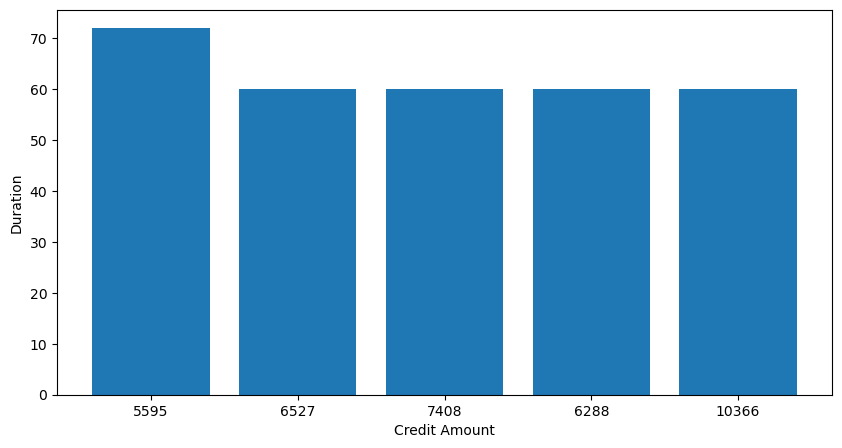

In [20]:
#Bar Plot

cad = data[["Credit amount","Duration"]]
cads = cad.groupby("Credit amount").mean().sort_values('Duration', ascending = False).head()
cads

plt.figure(figsize=(10,5))

x= np.arange(5)
plt.bar(x,cads['Duration'])
plt.xticks(x,cads.index)
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.show()


#### Dari hasil Bar Chart dapat disimpulkan orang dengan jumlah credit yang kecil cenderung memiliki durasi pembayaran yang lebih lama.

<AxesSubplot: xlabel='Job', ylabel='count'>

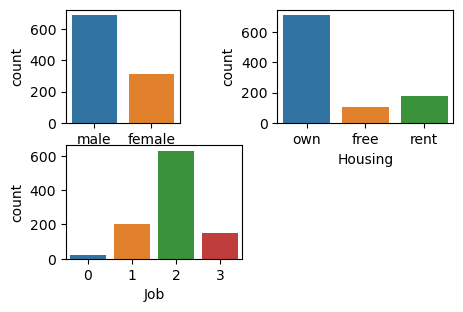

In [21]:
val = ['Sex', 'Housing', 'Job']

f=plt.figure(figsize=(5,5))
f.add_subplot(3,3,1)
sns.countplot(x=data[val[0]])

f.add_subplot(3,2,2)
sns.countplot(x=data[val[1]])

f.add_subplot(3,2,3)
sns.countplot(x=data[val[2]])

#### Dari hasil visualisasi Bar Chart dapat ditarik kesimpulan dimana, orang dengan jenis kelamin laki-laki, memiliki rumah pribadi, dan memiliki 2 pekerjaan cenderung memiliki jumlah credit yang lebih besar.

<AxesSubplot: xlabel='Age', ylabel='count'>

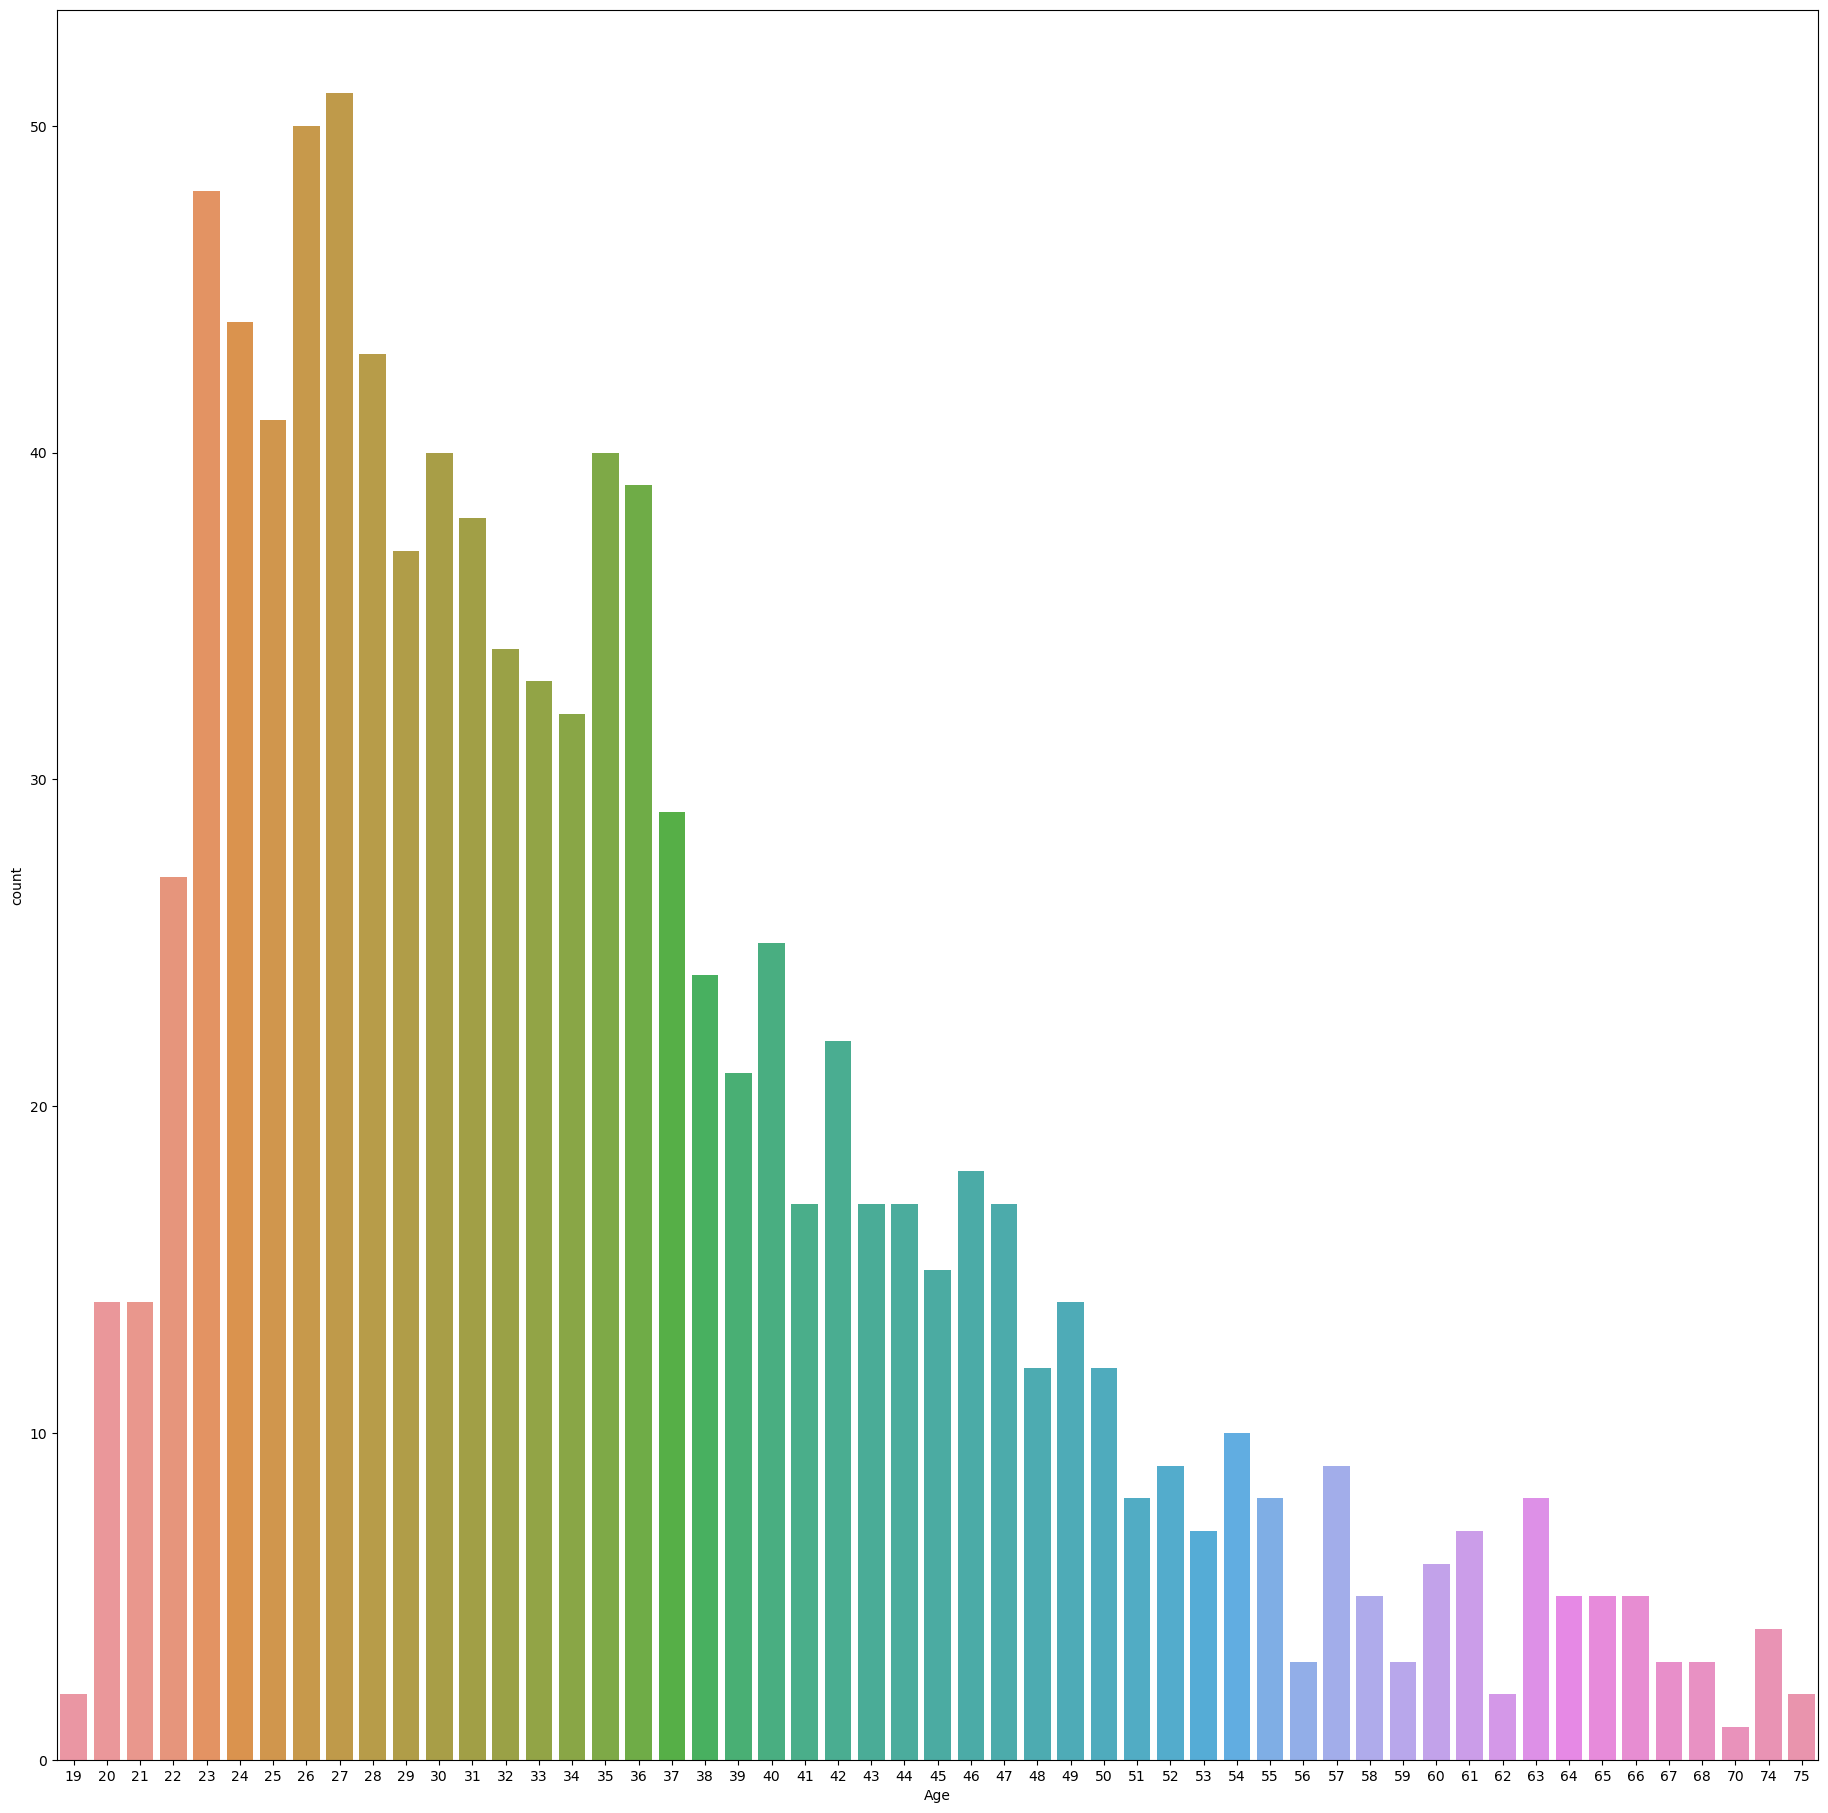

In [22]:
f=plt.figure(figsize=(50,50))
f.add_subplot(2,2,1)
sns.countplot(x=data['Age'])

#### Dari Bar Chart diatas dapat kita simpulkan, peminjam credit terbanyak berada di usaia 27 tahun dan yang paling kecil berusia 70 tahun.

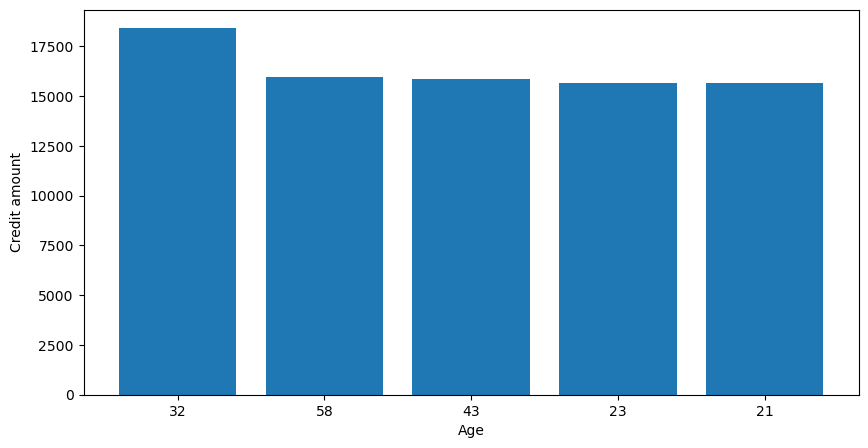

In [23]:
cad = data[["Age","Credit amount"]]
cads = cad.groupby("Age").max().sort_values('Credit amount', ascending = False).head()
cads

plt.figure(figsize=(10,5))

x= range(5)
plt.bar(x,cads['Credit amount'])
plt.xticks(x,cads.index)
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.show()

#### Dapat disimpulkan bahwa rata-rata peminjam credit terbesar berada di usia 32 tahun.

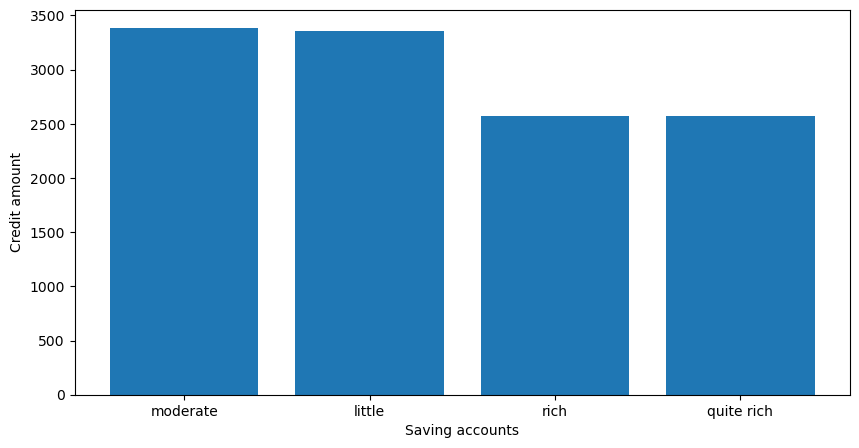

In [24]:
cad = data[["Saving accounts","Credit amount"]]
cads = cad.groupby("Saving accounts").mean().sort_values('Credit amount', ascending = False).head()
cads

plt.figure(figsize=(10,5))

x= range(4)
plt.bar(x,cads['Credit amount'])
plt.xticks(x,cads.index)
plt.xlabel('Saving accounts')
plt.ylabel('Credit amount')
plt.show()

#### dari Bar Chart diatas dapat disimpulkan kelompik moderate memiliki pinjaman credit terbesar.

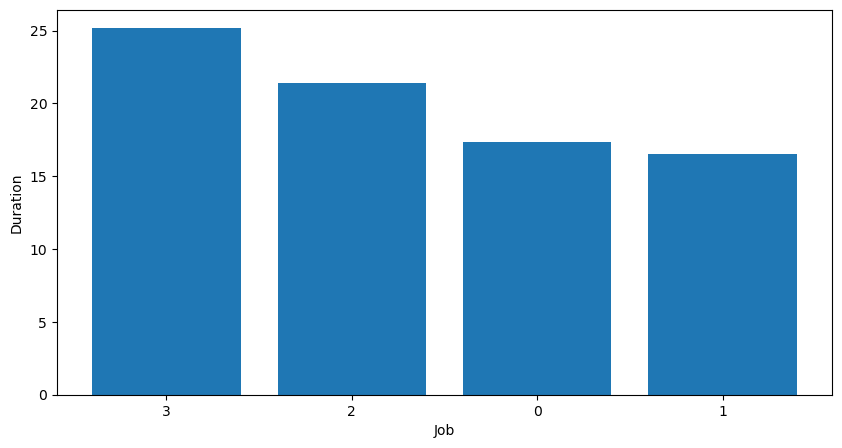

In [25]:
cad = data[["Job","Duration"]]
cads = cad.groupby("Job").mean().sort_values('Duration', ascending = False).head()
cads

plt.figure(figsize=(10,5))

x= range(4)
plt.bar(x,cads['Duration'])
plt.xticks(x,cads.index)
plt.xlabel('Job')
plt.ylabel('Duration')
plt.show()

#### Orang dengan 3 pekerjaan memiliki durasi pengembalian pinjaman paling lama.

In [26]:
dat = data.sort_values("Credit amount", ascending = False)
dat.head(1)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
915,915,32,female,3,own,little,moderate,18424,48,vacation/others


#### Dari dataset ditunjukan peminjaman paling besar merupakan seorang ibu berusia 32 tahun dengan 3 pekerjaan dan melakukan pinjaman untuk keperluan berlibur.

In [27]:
dats = data.groupby("Sex")
dats = dats["Duration"].mean()
dats

Sex
female    19.43871
male      21.56087
Name: Duration, dtype: float64

#### Data diatas menunjukan rata-rata pengembalian pinjaman paling lama berjenis kelamin laki-laki